# Plot Nr of Plants in Planoles HZ from 2009 to 2016

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj  # Package for doing GPS-calculations and Projections
from matplotlib import gridspec


my_proj = Proj(proj='utm', zone="31T", ellps='WGS84', units='m')  

In [14]:
# A few global Variable names.
# String of the Names of all Input Files:
years = np.arange(2009,2017)

input_folder =  "./Input_Data/data_all/"    # Name of the Folder used for Input Files
#output_folder = "./Output_Data/"

input_files = [input_folder + "Antspec" + str(y) + "_IDtrack.csv" for y in years]

# Area 51

In [60]:
data_tables = []   # List into which all data_tables will go.
headers = []       # List into which all headers will go.

for file_name in input_files:
    df = pd.read_csv(file_name, delimiter=",")     # Create Panda Data Frame
    print(file_name)
    print(len(df))
    data_tables.append(df)                                        # Append Panda Data 
    headers.append(list(df))
    
print("\n%i Files successfully loaded!" % len(data_tables))      # Quick Status Update

# Quickly check whether all headers are the same:
for i in range(1,len(headers)):
    equal=np.array_equal(headers[i-1], headers[i])
    if equal == False:
        raise ValueError("Not all headers are equal!")
print("All headers equal!")

print("\nData Format: ")
df = data_tables[0]

# Concatenate all the data into a single data Frame
print("\nMerging all the data!")
df=pd.concat(data_tables, axis=0, ignore_index=1) # Concatenate all Data; Ignore Indexing
print("Nr. of all individuals: %i" % df.shape[0])
df.reset_index(drop=1)
df.reset_index()
df.head(3)

./Input_Data/data_all/Antspec2009_IDtrack.csv
1924
./Input_Data/data_all/Antspec2010_IDtrack.csv
3118
./Input_Data/data_all/Antspec2011_IDtrack.csv
2568
./Input_Data/data_all/Antspec2012_IDtrack.csv
3740
./Input_Data/data_all/Antspec2013_IDtrack.csv
5757
./Input_Data/data_all/Antspec2014_IDtrack.csv
8714
./Input_Data/data_all/Antspec2015_IDtrack.csv
10599
./Input_Data/data_all/Antspec2016_IDtrack.csv
11101

8 Files successfully loaded!
All headers equal!

Data Format: 

Merging all the data!
Nr. of all individuals: 47521


,Population,Location,VisitID,PlantID,IDtrackOLD,IDtrack,Date,year,ThisYearLabel,Latitude,...,TotalFruit,CutStems,AbortedFlowers,Red,Yellow,phenoCat,LocationManualUpdater,GPS_horz_corr_m,GPS_alt_corr_m,Direction_from_GPS
0,Planoles,Unk,2022.0,J0001,1_J0001,2009_00001_J0001,2009-06-16,2009.0,1,42.321497,...,NaN,NaN,NaN,0.5,1.5,NaN,0,NaN,NaN,NaN
1,Planoles,Unk,2023.0,J0002,2_J0002,2009_00002_J0002,2009-06-16,2009.0,1,42.321479,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,Planoles,Unk,2024.0,J0003,3_J0003,2009_00003_J0003,2009-06-16,2009.0,1,42.321529,...,NaN,NaN,NaN,2.5,2.5,NaN,0,NaN,NaN,NaN


### Filter based on GPS Location
(Has the effect that non-GPSed plants drop out - however here we include already updated GPS)

In [128]:
min_lat, max_lat = 42.312, 42.342
min_lon, max_lon = 2.01, 2.125

lat_okay = (min_lat < df["Latitude"]) &  (df["Latitude"] < max_lat)
lon_okay = (min_lon < df["Longitude"]) & (df["Longitude"] < max_lon)

df_filter = df[lat_okay & lon_okay]
print(f"Filtered from {len(df)} to {len(df_filter)}")

Filtered from 47521 to 42255


## Plot per Year

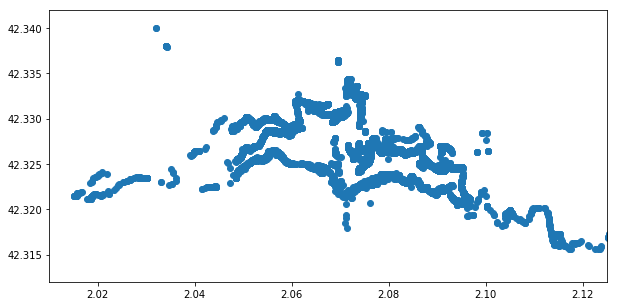

In [129]:
plt.figure(figsize=(10,5))
plt.scatter(df["Longitude"], df["Latitude"])
plt.xlim([min_lon, max_lon])
plt.ylim([min_lat, max_lat])
plt.show()

In [130]:
df_years = []

for i, y in enumerate(years):
    tot = np.sum(df["year"]==y)
    
    this_year = (df["year"]==y) & (df["ThisYearLabel"])
    this_year_hz = this_year & lat_okay & lon_okay
    df_year = df[this_year_hz]
    df_year = df_year.drop_duplicates(subset="PlantID")  # Filter Duplicates
    
    #print(set(df[this_year]))
    print(f"\nYear: {y}")
    print(f"Total samples: {tot}")
    print(f"Total samples new: {np.sum(this_year)}")
    print(f"Total samples new unique Planoles: {len(df_year)}")
    
    chars = set(df_year["PlantID"].str[0])
    print(f"Character: {chars}")
    
    df_years.append(df_year)


Year: 2009
Total samples: 1924
Total samples new: 1924
Total samples new unique Planoles: 1828
Character: {'J'}

Year: 2010
Total samples: 3118
Total samples new: 2296
Total samples new unique Planoles: 2004
Character: {'K'}

Year: 2011
Total samples: 2568
Total samples new: 1869
Total samples new unique Planoles: 1731
Character: {'L'}

Year: 2012
Total samples: 3740
Total samples new: 2764
Total samples new unique Planoles: 2031
Character: {'M'}

Year: 2013
Total samples: 5757
Total samples new: 4706
Total samples new unique Planoles: 3147
Character: {'P'}

Year: 2014
Total samples: 8714
Total samples new: 7352
Total samples new unique Planoles: 6386
Character: {'S'}

Year: 2015
Total samples: 10600
Total samples new: 6634
Total samples new unique Planoles: 5678
Character: {'T'}

Year: 2016
Total samples: 11099
Total samples new: 7329
Total samples new unique Planoles: 6015
Character: {'V'}


## Do the Plot

In [194]:
def plot_single_year(ax, lats, lons, 
                     min_lat = 42.312, max_lat = 42.345, min_lon=2.01, max_lon = 2.13, title="",fs=14):
    """Plots single year for Planoles
    ax: Axis Object to plot on"""
    ax.scatter(lons, lats, c="darkgreen", s=10)
    ax.set_xlim([min_lon, max_lon])
    ax.set_ylim([min_lat, max_lat])
    #ax.set_title(title)
    ax.text(x=0.5, y=0.9, s = f"Year {title}, Sample Nr: {len(lats)}", transform=ax.transAxes,ha="center", fontsize=fs)

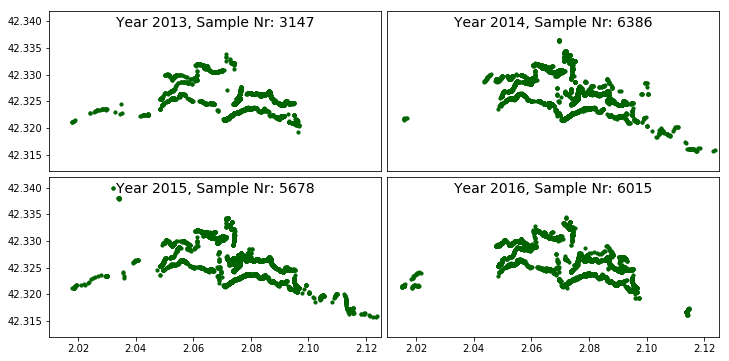

In [195]:
plt.figure(figsize=(12,6))

gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])
gs.update(hspace=0.04) # set the spacing between axes. 
gs.update(wspace=0.02) # set the spacing between axes.


for i in range(4):
    ax = plt.subplot(gs[int(i/2), i%2])
    
    j= -4 +i 
    y = years[j]
    plot_single_year(ax, df_years[j]["Latitude"], df_years[j]["Longitude"],
                    min_lat, max_lat, min_lon, max_lon, title=y)
    
    if i%2==1:
        ax.set_yticks([])
        
        
    if int(i/2)==0:
        ax.set_xticks([])

plt.savefig("./Figures/unique_sample_nr_planoles.pdf", bbox_inches = 'tight', pad_inches = 0)        
plt.show()

# Area 51

In [96]:
unique_ids = list(set(df["PlantID"]))
unique_ids[2][0]

'S'

In [65]:
df.dtypes

Population                object
Location                  object
VisitID                  float64
PlantID                   object
IDtrackOLD                object
IDtrack                   object
Date                      object
year                     float64
ThisYearLabel              int64
Latitude                 float64
Longitude                float64
Altitude                 float64
CorrectedLatitude        float64
CorrectedLongitude       float64
CorrectedAltitude        float64
Easting                  float64
Northing                 float64
DistEastofCentre         float64
DistNorthOfCentre        float64
HorzErr                  float64
VertErr                  float64
GPS                      float64
Comments                  object
Alive                     object
Perennial                 object
FloweringStage            object
NumFloweringStems        float64
NumVegetativeStems       float64
EstimFlowers             float64
FirstFlowered             object
StemHeight